In [1]:
#Install citipy library
!pip install citipy

#Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from citipy import citipy
from pprint import pprint
import time

#Import API key for OpenWeatherMapy
from config import owm_key

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


### Generate Cities List

In [2]:
#Create DataFrame
cities_df = pd.DataFrame()

#Add columns for City and Country
cities_df["City"] = ""
cities_df["Country"] = ""

#Generate 500+ random latitudes and longitudes, then add new columns and values to Dataframe
cities_df["Latitude"] = np.random.uniform(low=-90, high=90, size=1500)
cities_df["Longitude"] = np.random.uniform(low=-180, high=180, size=1500)
cities_df = round(cities_df, 2)

#Add columns to DataFrame for wanted values
cities_df["Temperature (F)"] = ""
cities_df["Humidity (%)"] = ""
cities_df["Cloudiness (%)"] = ""
cities_df["Wind Speed (mph)"] = ""


#Find and add nearest city & country based on the randomly selected lat and lng
for index, row in cities_df.iterrows():
    lat = row["Latitude"]
    lng = row["Longitude"]
    cities_df.set_value(index, "City", citipy.nearest_city(lat, lng).city_name)
    cities_df.set_value(index, "Country", citipy.nearest_city(lat, lng).country_code)

    #Drop duplicate cities
cities_df.drop_duplicates(["City", "Country"], inplace=True)
cities_df.reset_index(inplace=True)

#Delete unneccesary column for aesthetics 
del cities_df["index"]

#Display updated DataFrame
cities_df.head()

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,rikitea,pf,-40.05,-115.91,,,,
1,sept-iles,ca,56.62,-67.10,,,,
2,altay,cn,48.72,88.69,,,,
3,port alfred,za,-81.04,43.20,,,,
4,ushuaia,ar,-74.44,-23.60,,,,


In [3]:
#Check to be sure we have 500+ cities for dataset
len(cities_df)

612

### Perform API Calls

In [4]:
#Config info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#Access the data from openweathermapy
print("Beginning Data Retrieval")
print("---------------------------------------------------------------")

for index, row in cities_df.iterrows():
    #Target URL
    query_url = "http://api.openweathermap.org/data/2.5/weather?q=%s,%s&units=%s&appid=%s" % (row["City"], row["Country"], units, owm_key)
    
    #Print to easily read loop
    print(f"Now retrieving City #" + str(index) + ": " + row["City"] + ", " + row["Country"])
    print(query_url)
    
    #Run requests to API
    weather_data = requests.get(query_url).json()
    
    #Use exceptional handling  to calculate and append values to DataFrame
    try:
        response = weather_data
        cities_df.set_value(index, "Temperature (F)", response["main"]["temp"])
        cities_df.set_value(index, "Humidity (%)", response["main"]["humidity"])
        cities_df.set_value(index, "Cloudiness (%)", response["clouds"]["all"])
        cities_df.set_value(index, "Wind Speed (mph)", response["wind"]["speed"])
    except:
        print("Error with city data... Skipping")
    
    
print("---------------------------------------------------------------")
print("Data Retrieval Complete")
print("---------------------------------------------------------------")  

#Covert strings to floats for DataFrame
columns = ["Latitude", "Longitude", "Temperature (F)", "Humidity (%)", "Cloudiness (%)", "Wind Speed (mph)"]
for column in columns:
    cities_df[column] = pd.to_numeric(cities_df[column], errors="coerce")

Beginning Data Retrieval
---------------------------------------------------------------
Now retrieving City #0: rikitea, pf
http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #1: sept-iles, ca
http://api.openweathermap.org/data/2.5/weather?q=sept-iles,ca&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #2: altay, cn
http://api.openweathermap.org/data/2.5/weather?q=altay,cn&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #3: port alfred, za
http://api.openweathermap.org/data/2.5/weather?q=port alfred,za&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #4: ushuaia, ar
http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #5: mount isa, au
http://api.openweathermap.org/data/2.5/weather?q=mount isa,au&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f

Error with city data... Skipping
Now retrieving City #53: safranbolu, tr
http://api.openweathermap.org/data/2.5/weather?q=safranbolu,tr&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #54: porto novo, cv
http://api.openweathermap.org/data/2.5/weather?q=porto novo,cv&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #55: bambous virieux, mu
http://api.openweathermap.org/data/2.5/weather?q=bambous virieux,mu&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #56: punta arenas, cl
http://api.openweathermap.org/data/2.5/weather?q=punta arenas,cl&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #57: margate, za
http://api.openweathermap.org/data/2.5/weather?q=margate,za&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #58: khasan, ru
http://api.openweathermap.org/data/2.5/weather?q=khasan,ru&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #59: 

Now retrieving City #107: borup, dk
http://api.openweathermap.org/data/2.5/weather?q=borup,dk&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #108: hobart, au
http://api.openweathermap.org/data/2.5/weather?q=hobart,au&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #109: qinzhou, cn
http://api.openweathermap.org/data/2.5/weather?q=qinzhou,cn&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #110: coahuayana, mx
http://api.openweathermap.org/data/2.5/weather?q=coahuayana,mx&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #111: lorengau, pg
http://api.openweathermap.org/data/2.5/weather?q=lorengau,pg&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #112: mumbwa, zm
http://api.openweathermap.org/data/2.5/weather?q=mumbwa,zm&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #113: nueva loja, ec
http://api.openweathermap.org/data/2.5/weather?

Now retrieving City #160: ucluelet, ca
http://api.openweathermap.org/data/2.5/weather?q=ucluelet,ca&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #161: guadalajara, es
http://api.openweathermap.org/data/2.5/weather?q=guadalajara,es&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #162: half moon bay, us
http://api.openweathermap.org/data/2.5/weather?q=half moon bay,us&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #163: contamana, pe
http://api.openweathermap.org/data/2.5/weather?q=contamana,pe&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #164: upernavik, gl
http://api.openweathermap.org/data/2.5/weather?q=upernavik,gl&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #165: san policarpo, ph
http://api.openweathermap.org/data/2.5/weather?q=san policarpo,ph&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #166: thompson, ca
http://

Now retrieving City #212: victoria, sc
http://api.openweathermap.org/data/2.5/weather?q=victoria,sc&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #213: belushya guba, ru
http://api.openweathermap.org/data/2.5/weather?q=belushya guba,ru&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Error with city data... Skipping
Now retrieving City #214: ust-tsilma, ru
http://api.openweathermap.org/data/2.5/weather?q=ust-tsilma,ru&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #215: tumannyy, ru
http://api.openweathermap.org/data/2.5/weather?q=tumannyy,ru&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Error with city data... Skipping
Now retrieving City #216: esperance, au
http://api.openweathermap.org/data/2.5/weather?q=esperance,au&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #217: belaya gora, ru
http://api.openweathermap.org/data/2.5/weather?q=belaya gora,ru&units=imperial&appid=bec2deb1e63f486b3e900

Now retrieving City #265: fortuna, us
http://api.openweathermap.org/data/2.5/weather?q=fortuna,us&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #266: bowen, au
http://api.openweathermap.org/data/2.5/weather?q=bowen,au&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #267: bauchi, ng
http://api.openweathermap.org/data/2.5/weather?q=bauchi,ng&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #268: karpathos, gr
http://api.openweathermap.org/data/2.5/weather?q=karpathos,gr&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #269: gemena, cd
http://api.openweathermap.org/data/2.5/weather?q=gemena,cd&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #270: levelland, us
http://api.openweathermap.org/data/2.5/weather?q=levelland,us&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #271: vao, nc
http://api.openweathermap.org/data/2.5/weather?q=vao,n

Now retrieving City #318: shimoda, jp
http://api.openweathermap.org/data/2.5/weather?q=shimoda,jp&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #319: grindavik, is
http://api.openweathermap.org/data/2.5/weather?q=grindavik,is&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #320: saurimo, ao
http://api.openweathermap.org/data/2.5/weather?q=saurimo,ao&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #321: pundaguitan, ph
http://api.openweathermap.org/data/2.5/weather?q=pundaguitan,ph&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #322: bakchar, ru
http://api.openweathermap.org/data/2.5/weather?q=bakchar,ru&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #323: amiens, fr
http://api.openweathermap.org/data/2.5/weather?q=amiens,fr&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #324: pevek, ru
http://api.openweathermap.org/data/2.5/wea

Now retrieving City #370: meulaboh, id
http://api.openweathermap.org/data/2.5/weather?q=meulaboh,id&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #371: karaul, ru
http://api.openweathermap.org/data/2.5/weather?q=karaul,ru&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Error with city data... Skipping
Now retrieving City #372: vuktyl, ru
http://api.openweathermap.org/data/2.5/weather?q=vuktyl,ru&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #373: coihueco, cl
http://api.openweathermap.org/data/2.5/weather?q=coihueco,cl&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #374: lolua, tv
http://api.openweathermap.org/data/2.5/weather?q=lolua,tv&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Error with city data... Skipping
Now retrieving City #375: kautokeino, no
http://api.openweathermap.org/data/2.5/weather?q=kautokeino,no&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City 

Now retrieving City #422: ulladulla, au
http://api.openweathermap.org/data/2.5/weather?q=ulladulla,au&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #423: yanji, cn
http://api.openweathermap.org/data/2.5/weather?q=yanji,cn&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #424: lukow, pl
http://api.openweathermap.org/data/2.5/weather?q=lukow,pl&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #425: guerrero negro, mx
http://api.openweathermap.org/data/2.5/weather?q=guerrero negro,mx&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #426: husavik, is
http://api.openweathermap.org/data/2.5/weather?q=husavik,is&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #427: san cristobal, ec
http://api.openweathermap.org/data/2.5/weather?q=san cristobal,ec&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #428: pozo colorado, py
http://api.openweather

Now retrieving City #477: shagonar, ru
http://api.openweathermap.org/data/2.5/weather?q=shagonar,ru&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #478: richards bay, za
http://api.openweathermap.org/data/2.5/weather?q=richards bay,za&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #479: jakar, bt
http://api.openweathermap.org/data/2.5/weather?q=jakar,bt&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #480: bose, cn
http://api.openweathermap.org/data/2.5/weather?q=bose,cn&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Error with city data... Skipping
Now retrieving City #481: vysokogornyy, ru
http://api.openweathermap.org/data/2.5/weather?q=vysokogornyy,ru&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #482: uray, ru
http://api.openweathermap.org/data/2.5/weather?q=uray,ru&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #483: kathu, th
http://api.op

Now retrieving City #529: myitkyina, mm
http://api.openweathermap.org/data/2.5/weather?q=myitkyina,mm&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #530: gainesville, us
http://api.openweathermap.org/data/2.5/weather?q=gainesville,us&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #531: warmbad, na
http://api.openweathermap.org/data/2.5/weather?q=warmbad,na&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #532: parrita, cr
http://api.openweathermap.org/data/2.5/weather?q=parrita,cr&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #533: shubarshi, kz
http://api.openweathermap.org/data/2.5/weather?q=shubarshi,kz&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #534: orlik, ru
http://api.openweathermap.org/data/2.5/weather?q=orlik,ru&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #535: jega, ng
http://api.openweathermap.org/data/2.5/we

Now retrieving City #581: tallahassee, us
http://api.openweathermap.org/data/2.5/weather?q=tallahassee,us&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #582: celje, si
http://api.openweathermap.org/data/2.5/weather?q=celje,si&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #583: victor harbor, au
http://api.openweathermap.org/data/2.5/weather?q=victor harbor,au&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #584: medvedka, ru
http://api.openweathermap.org/data/2.5/weather?q=medvedka,ru&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #585: santa rosa, co
http://api.openweathermap.org/data/2.5/weather?q=santa rosa,co&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #586: lexington, us
http://api.openweathermap.org/data/2.5/weather?q=lexington,us&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #587: sexsmith, ca
http://api.openweathe

In [5]:
#Drop NaN values from DataFrame
cities_df.dropna(inplace=True)

#Display final DataFrame
cities_df.head()

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,rikitea,pf,-40.05,-115.91,80.79,100.0,88.0,16.93
1,sept-iles,ca,56.62,-67.10,19.40,67.0,20.0,5.82
2,altay,cn,48.72,88.69,33.72,92.0,92.0,1.72
3,port alfred,za,-81.04,43.20,64.05,96.0,0.0,10.00
4,ushuaia,ar,-74.44,-23.60,46.40,70.0,40.0,18.34


In [6]:
#Check for missing values in DataFrame
cities_df.count()

City                534
Country             534
Latitude            534
Longitude           534
Temperature (F)     534
Humidity (%)        534
Cloudiness (%)      534
Wind Speed (mph)    534
dtype: int64

In [7]:
#Export DataFrame as CSV
cities_df.to_csv("Output/city_weather_info.csv")

### Latitude vs Temperature Plot

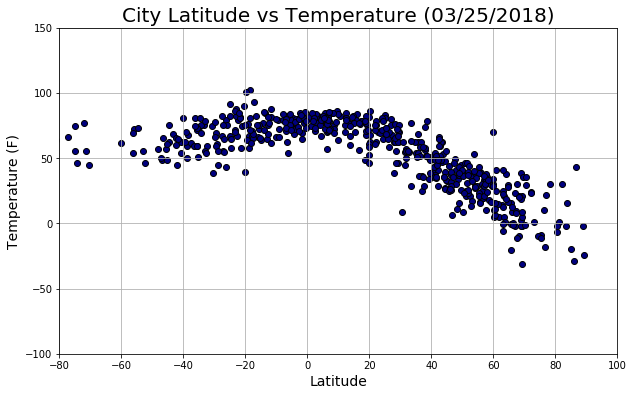

In [8]:
#Define axis values
x_axis = cities_df["Latitude"]
y_axis = cities_df["Temperature (F)"]

#Set size of scatter plots
plt.figure(figsize=(10,6))

#Create scatter plot
plt.scatter(x_axis, y_axis, color="navy", edgecolors="black")

#Aesthetics
plt.title("City Latitude vs Temperature " + "(" + time.strftime("%m/%d/%Y") + ")", fontsize=20)
plt.xlabel("Latitude", fontsize=14)
plt.xlim(-80,100)
plt.ylabel("Temperature (F)", fontsize=14)
plt.ylim(-100,150)

#Save plot as PNG image
plt.savefig("Images/Latitude_vs_Temperature.png")

plt.grid()
plt.show()

### Latitude vs Humidity Plot

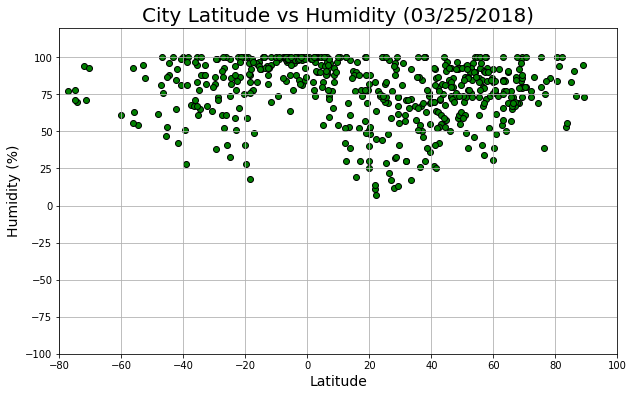

In [9]:
#Define axis values
x_axis = cities_df["Latitude"]
y_axis = cities_df["Humidity (%)"]

#Set size of scatter plots
plt.figure(figsize=(10,6))

#Create scatter plot
plt.scatter(x_axis, y_axis, color="green", edgecolors="black")

#Aesthetics
plt.title("City Latitude vs Humidity " + "(" + time.strftime("%m/%d/%Y") + ")", fontsize=20)
plt.xlabel("Latitude", fontsize=14)
plt.xlim(-80,100)
plt.ylabel("Humidity (%)", fontsize=14)
plt.ylim(-100,120)

#Save plot as PNG image
plt.savefig("Images/Latitude_vs_Humidity.png")

plt.grid()
plt.show()

### Latitude vs Cloudiness Plot

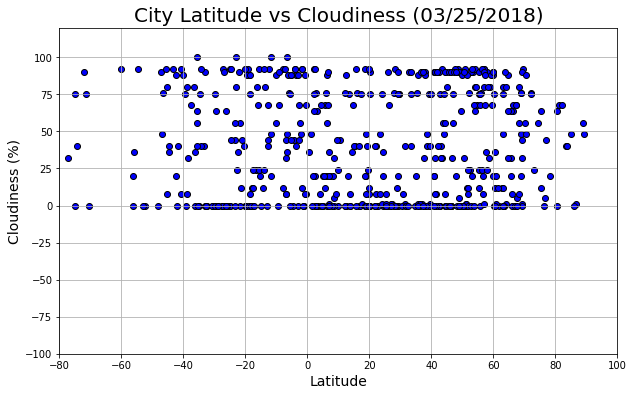

In [13]:
#Define axis values
x_axis = cities_df["Latitude"]
y_axis = cities_df["Cloudiness (%)"]

#Set size of scatter plots
plt.figure(figsize=(10,6))

#Create scatter plot
plt.scatter(x_axis, y_axis, color="blue", edgecolors="black")

#Aesthetics
plt.title("City Latitude vs Cloudiness " + "(" + time.strftime("%m/%d/%Y") + ")", fontsize=20)
plt.xlabel("Latitude", fontsize=14)
plt.xlim(-80,100)
plt.ylabel("Cloudiness (%)", fontsize=14)
plt.ylim(-100,120)

#Save plot as PNG image
plt.savefig("Images/Latitude_vs_Cloudiness.png")

plt.grid()
plt.show()

### Latitude vs Wind Speed Plot

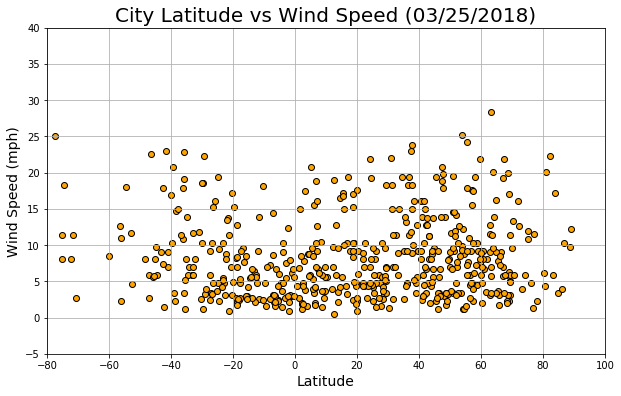

In [14]:
#Define axis values
x_axis = cities_df["Latitude"]
y_axis = cities_df["Wind Speed (mph)"]

#Set size of scatter plots
plt.figure(figsize=(10,6))

#Create scatter plot
plt.scatter(x_axis, y_axis, color="orange", edgecolors="black")

#Aesthetics
plt.title("City Latitude vs Wind Speed " + "(" + time.strftime("%m/%d/%Y") + ")", fontsize=20)
plt.xlabel("Latitude", fontsize=14)
plt.xlim(-80,100)
plt.ylabel("Wind Speed (mph)", fontsize=14)
plt.ylim(-5,40)

#Save plot as PNG image
plt.savefig("Images/Latitude_vs_WindSpeed.png")

plt.grid()
plt.show()